# The noble monkeys and the Moderna vaccine

In [1]:
# Don't change this cell; just run it.
import numpy as np
import pandas as pd
# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')
import matplotlib.pyplot as plt
%matplotlib inline
# The OKpy testing system.
from client.api.notebook import Notebook
ok = Notebook('nobler_monkeys.ok')

Assignment: nobler monkeys
OK, version v1.18.1



The tests in this notebook usually do not test if you have the *right* answer,
but only if you have the *right sort* of answer.  *Be careful* -- the tests
could pass, but your answer could still be wrong.

## Background

We are scientists evaluating data in the middle of a pandemic, and we again
have the task of deciding whether the Moderna vaccine
[mRNA-1273](https://en.wikipedia.org/wiki/Moderna#COVID-19_vaccine_candidate)
for COVID-19 is effective or not.

The full clinical trials are not yet out, but we have some [data from a study
on rhesus macaque
monkeys](https://www.nejm.org/doi/full/10.1056/NEJMoa2024671).

There were three groups of monkeys in the study.   All monkeys in each group
had got two injections of their allocated vaccination type, four weeks apart.
Their vaccination types were:

* **High-dose vaccine** (HDV) - 100 micrograms of the vaccine - 8 monkeys.
* **Low-dose vaccine** (LDV) - 10 micrograms of the vaccine - 8 monkeys.
* **Placebo** (PLAC) - salt water - 8 monkeys.

Here we only consider the HDV group and the Placebo group.  We call the HDV
group the "Modvax" group.

Four weeks after their second vaccination, the team infected each monkey with
COVID-19, and then measured various aspects of their response.

One aspect of their response was the number of copies of virus RNA they recovered from a nasal swab 2 days after infection.

Here are those numbers.

In [2]:
nobler = pd.read_csv('nobler_monkeys.csv')
nobler

,Group,RNA copies
0,Movax,1770.0
1,Movax,13500.0
2,Movax,86400.0
3,Movax,3750.0
4,Movax,179000.0
5,Movax,8410.0
6,Movax,189.0
7,Movax,48500.0
8,Placebo,255.0
9,Placebo,12100.0


You can confirm these numbers for yourself from the paper's [supplementary
Appendix 2
spreadsheet](https://www.nejm.org/doi/suppl/10.1056/NEJMoa2024671/suppl_file/nejmoa2024671_appendix_2.xlsx).
They are the day 2 Nasal Swab (NS) values of "Viral RNA copies / mL".

Notice that the first 8 rows correspond to the 8 monkeys who received the
Moderna vaccine, and final 8 rows correspond the monkey receiving the placebo.

To make things a little simpler, we get the number of RNA copies as an array,
and divide by 1000, to give the number of kilocopies.

In [3]:
rna_copies_k = np.array(nobler['RNA copies']) / 1000

## Your task

We are interested in the difference between these two groups of 8 numbers.

As responsible analysts of data, we start by plotting the distributions of the two groups:

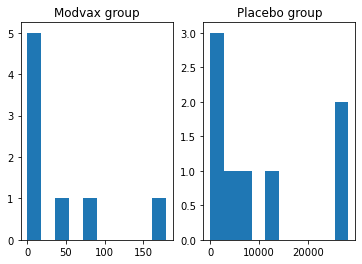

In [4]:
# Plot the two distributions side by side.
fig, axes = plt.subplots(1, 2)
axes[0].hist(rna_copies_k[:8]);
axes[0].set_title('Modvax group')
axes[1].hist(rna_copies_k[8:]);
axes[1].set_title('Placebo group');

Now consider the means of the two groups.  The means are:

In [5]:
modvax_mean = np.mean(rna_copies_k[:8])
placebo_mean = np.mean(rna_copies_k[8:])
print('Modvax mean', modvax_mean)
print('Placebo mean', placebo_mean)

Modvax mean 42.689875
Placebo mean 10200.294375


As expected, the placebo group have, on average, more viral copies in their
noses, at day 2 of the infection.

The mean difference is:

In [6]:
plac_modvax_diff = placebo_mean - modvax_mean
print('Placebo - modvax mean difference', plac_modvax_diff)

Placebo - modvax mean difference 10157.6045


Your job is to do a *permutation* test, to see whether this observed mean
difference is plausible in an ideal (null) world, where there is no real
difference between the groups, and any observed difference is just due to
random sampling.

We simulate samples from such an ideal world by shuffling the 16 values randomly, allocating 8 shuffled values to a fake Modvax group, and the other 8 to the fake Placebo group, and calculating the mean difference for these fake groups.  We do this many times to build up the *sampling distribution* of these fake differences.

To do this job, you may want to remind yourself of the [permutation
idea](https://uob-ds.github.io/cfd2021/permutation/permutation_idea.html) notebook in the
textbook.

You may well want to start with a cell that does one trial where you:

* shuffle the values
* split them into two groups of 8
* calculate the difference in means.

In [7]:
#- You may want to simulate a single trial here.
def permute_mean(data):
    shuffled = np.random.permutation(data)
    return np.mean(shuffled[:8]) - np.mean(shuffled[8:])
permute_mean(rna_copies_k)

4421.4595

Then finish up the cell below to build your sampling distribution, storing the values in the array `fake_diffs`.

In [8]:
# Build up the sampling distribution from the ideal (null) world.
n_iters = 10000
fake_diffs = np.array([permute_mean(rna_copies_k) for i in range(10000)])
# Show the first 10 values.
fake_diffs[:10]

array([-6811.017  ,    19.66925, -1804.767  ,  3128.2655 ,   298.03925,
         578.19425,  7340.20575,   809.6655 , -2874.8295 ,  2883.90575])

In [9]:
_ = ok.grade('q_fake_diffs')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



You might also like to review the histogram of these values, to compare by eye to the value in the real world, `plac_modvax_diff`.

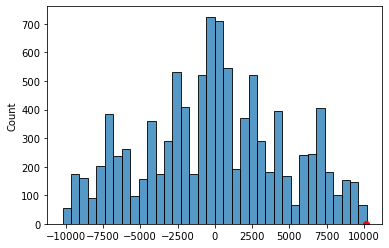

In [10]:
#- Consider a histogram of the sampling distribution here.
import seaborn as sns
sns.histplot(fake_diffs)
plt.plot(plac_modvax_diff,0,'o',color='red')


In [11]:
plac_modvax_diff

10157.6045

Calculate the proportion of the sampling distribution values that are greater than or equal to the observed difference in means.

In [12]:
prop_ge = np.count_nonzero(fake_diffs >= plac_modvax_diff) / len(fake_diffs)
# Show the proportion.
prop_ge

0.0026

In [13]:
_ = ok.grade('q_prop_ge')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



## Done

You're finished with the assignment!  Be sure to...

- **run all the tests** (the next cell has a shortcut for that),
- **Save and Checkpoint** from the "File" menu.
- Finally, **restart** the kernel for this notebook, and **run all the cells**,
  to check that the notebook still works without errors.  Use the
  "Kernel" menu, and choose "Restart and run all".  If you find any
  problems, go back and fix them, save the notebook, and restart / run
  all again, before submitting.  When you do this, you make sure that
  we, your humble markers, will be able to mark your notebook.

In [14]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a9b66b26-47d5-443a-94c0-52ae213d321f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>